<a href="https://colab.research.google.com/github/HansanaNanayakkara/Deep-Learning-Mini-Project-02/blob/main/Deep_Learning_Mini_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import cv2
import os


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
os.chdir("/content/drive/My Drive/Dialog Axiata/")
os.getcwd()

'/content/drive/My Drive/Dialog Axiata'

In [70]:
data = pd.read_csv('Dialog Axiata.csv', parse_dates=['Date'])

In [71]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [72]:
data = data.dropna()

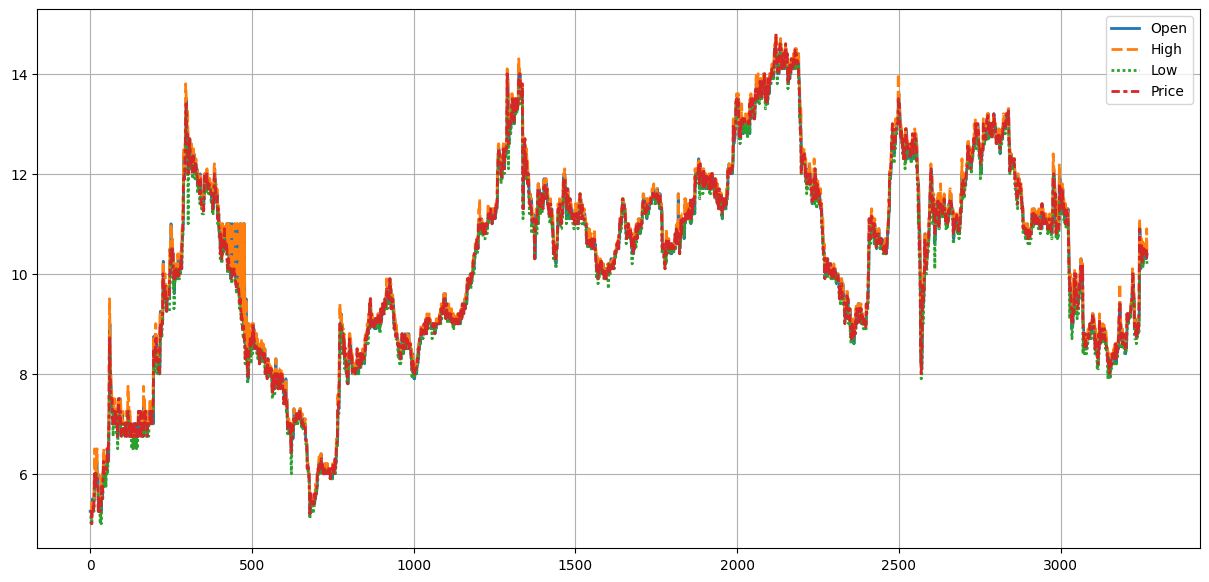

In [73]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data[['Open', 'High', 'Low', 'Price']], linewidth=2)
plt.grid(True)
plt.show()

In [74]:
df = data.filter(['Price'])

In [75]:
dataset = df.values

In [76]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [77]:
# Split the data into training and testing sets
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

In [78]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])


In [79]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
#Reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [81]:
#Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [82]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2555/2555 [==============================] - 85s 32ms/step - loss: 0.0018


In [84]:
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

In [85]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [86]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 17ms/step


In [87]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.0494537373604222


In [88]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-88-c6cb20b0ec05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


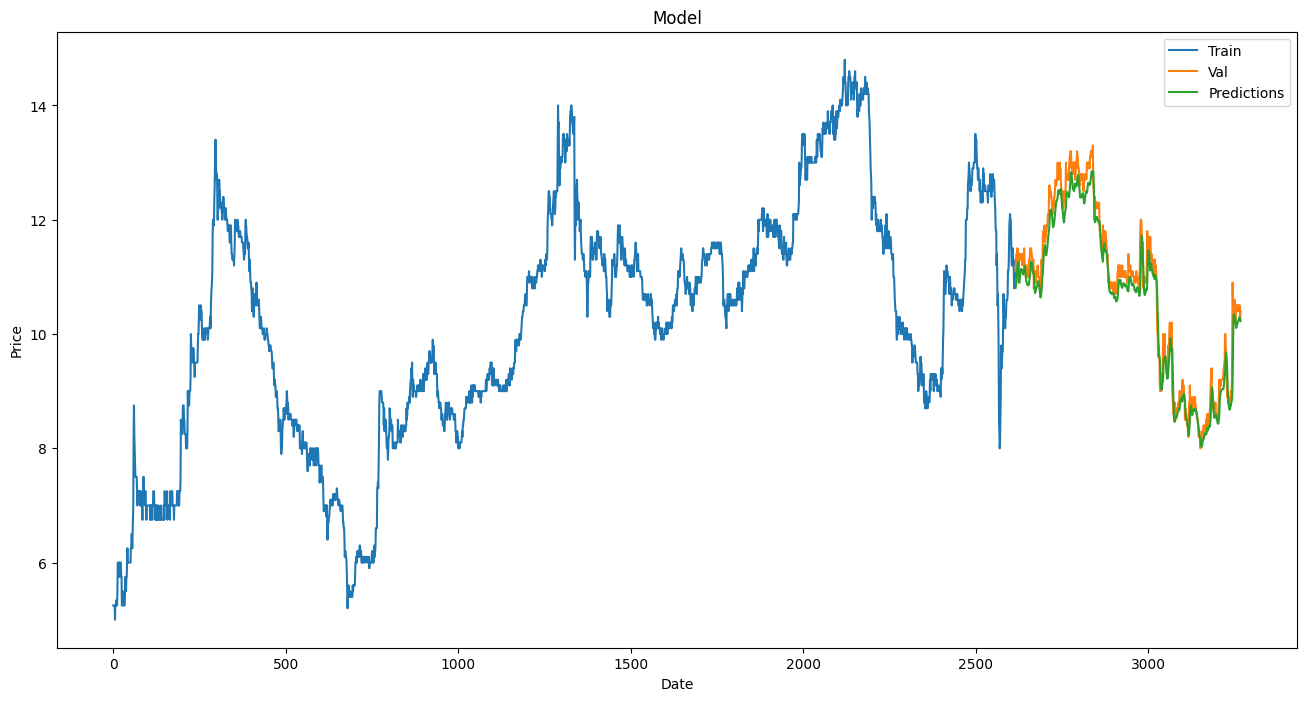

In [89]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()